<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_ingredients_percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pulp import *


## Model define
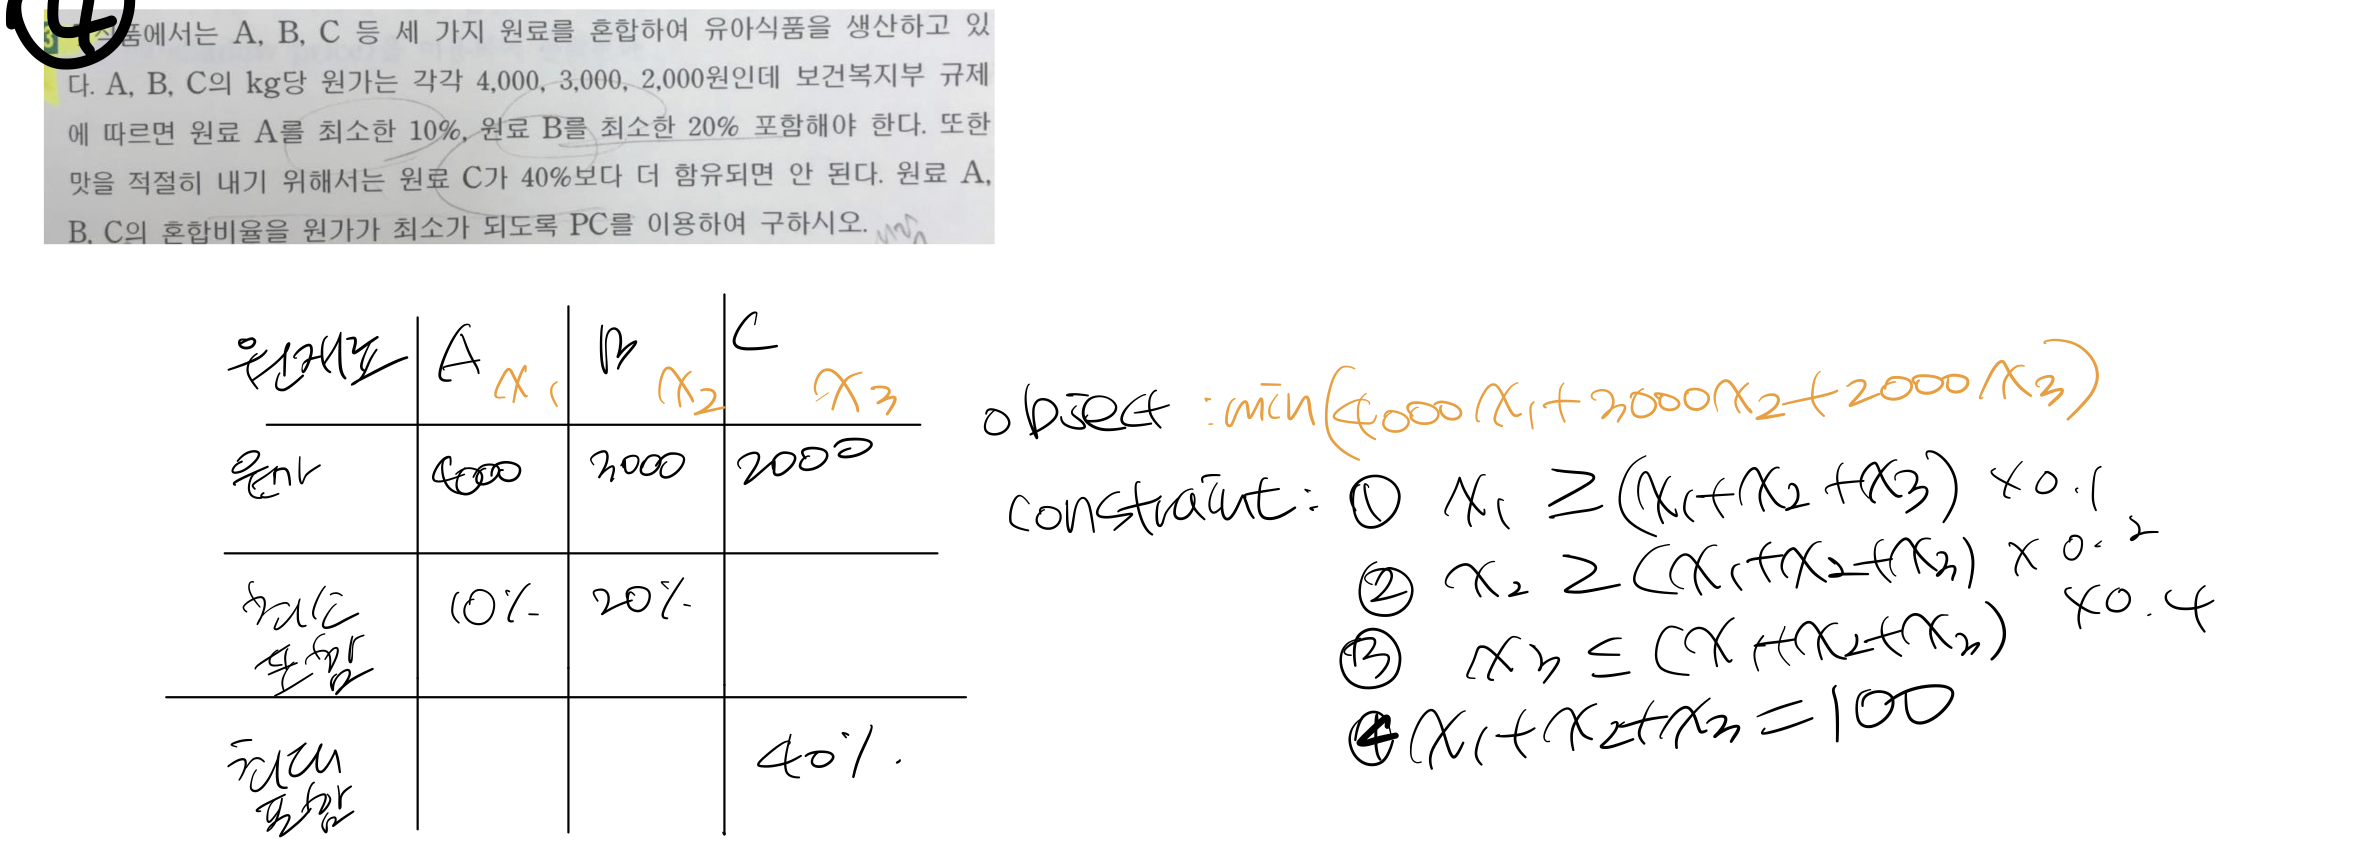

In [ ]:
model =LpProblem(name ='Makingfood', sense =LpMinimize)

num_variables =3
variables =[LpVariable(name=f'x{i}', lowBound=0) for i in range(1,num_variables+1)]

## Constraints

In [ ]:
constraints=[]
constr_coeff =[[0.9, -0.1,-0.1], [-0.2, 0.8, -0.2], [0.4, 0.4, -0.6]]
constraints_num =3

for i in range(constraints_num):
  rhs_values =[0,0,0]
  constr_sup =LpConstraint(
      e =LpAffineExpression([(variables[j], constr_coeff[i][j]) for j in range(num_variables)]),
      sense =LpConstraintGE,
      rhs =rhs_values[i],
      name =f'constraint_sup{i+1}'
  )
  constraints.append(constr_sup)

constr_coeff2 =[1,1,1]
constraints2_num =1

for i in range(constraints2_num):
  rhs_values2=[100]
  constr_sup2 = LpConstraint(
      e = LpAffineExpression([(variables[j], constr_coeff2[i] ) for j in range(num_variables)]),
      sense =LpConstraintEQ,
      rhs =rhs_values2[i],
      name =f'constraint_sup{i+4}'
  )
  constraints.append(constr_sup2)

## Define Object
### add object to model

In [ ]:
obj_coeff =[4000, 3000, 2000]
obj = LpAffineExpression([(variables[i], obj_coeff[i]) for i in range(num_variables)])
model += obj

## Add variables, constraints

In [ ]:
for constraint in constraints:
  model += constraint
print(model)
model.writeLP('out.txt')

Makingfood:
MINIMIZE
4000*x1 + 3000*x2 + 2000*x3 + 0
SUBJECT TO
constraint_sup1: 0.9 x1 - 0.1 x2 - 0.1 x3 >= 0

constraint_sup2: - 0.2 x1 + 0.8 x2 - 0.2 x3 >= 0

constraint_sup3: 0.4 x1 + 0.4 x2 - 0.6 x3 >= 0

constraint_sup4: x1 + x2 + x3 = 100

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous



[x1, x2, x3]

In [ ]:
model.solve()

for variable in variables:
  print(f'{variable.name} : {variable.value()}')

print(f'Optimal object value: {model.objective.value()}')

x1 : 10.0
x2 : 50.0
x3 : 40.0
Optimal object value: 270000.0
